In [ ]:


fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np


In [ ]:
np.column_stack(([1,2,3], [4,5,6]))            #column_stack(): 전달받은 리스트 나란히 연결

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))

In [ ]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
from sklearn.model_selection import train_test_split  #train_test_split()함수 소환 이 함수는 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 줍니다. 물론 나누기 전에 알아서 섞어 줍니다

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier #knn(k최근접 이웃 분류기 쓰기위해 가져, 가장 가까운 이웃들이 무엇을 선택했는지 보고 예측)
kn =  KNeighborsClassifier()                  #kn 변수에 모델 저장
kn.fit(train_input, train_target)            #모델 훈련시키기 train_input: 훈련 데이터 (물고기의 길이와 무게 정보들), train_target: 정답 데이터 (각 물고기가 도미인지 빙어인지) 이걸 통해 모델이 "어떤 길이/무게일 때 도미인지 빙어인지"를 학습합니다.
kn.score(test_input, test_target)            # 모델이 얼마나 정확한지 예

1.0

In [ ]:
print(kn.predict([[25, 150]]))   #물고기 한 마리의 길이 25cm, 무게 150g일 때 도미인지 빙어인지 예측하는 코

[0.]


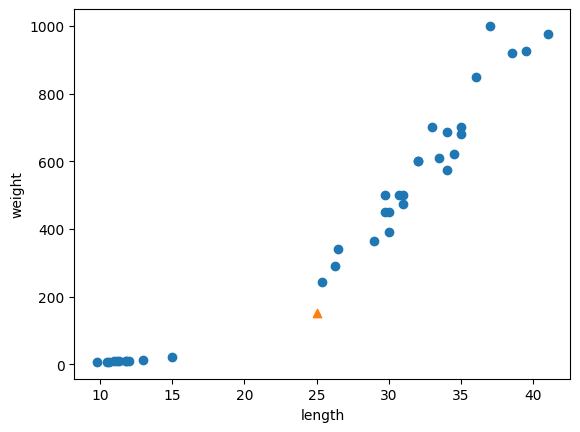

In [ ]:
import matplotlib.pyplot as plt   # 이 코드는 시각화를 통해 모델이 어떤 데이터를 학습했고, 새 물고기(25cm, 150g)가 어디쯤 위치하는지를 직접 눈으로 확인하는 과정입니다.
plt.scatter(train_input[:,0], train_input[:,1])   #훈련 데이터(도미+빙어) 시각화, 길이 데이터 (X축), 무게 데이터 (Y축)
plt.scatter(25, 150, marker='^')        # 예측할 새로운 물고기 (길이 25cm, 무게 150g)를 그래프에 표시, 점대신 삼각형으로 표
plt.xlabel('length')                # X축: length (길이), Y축: weight (무게)
plt.ylabel('weight')                   # Y축: weight (무게)
plt.show()              # 그림은 도미데이터에 가까움 근데 빙어 데이터에 가깝다고 함... 샘플줄 다수인 클래스를 예측으로 사용함으로

여기서 잠깐... 왜 이 모델이 도미에 더 가까운데 빙어 데이터에 가깝다고 판단했을까?
kKNeighborsClassifier 클래스는 주어진 샘플에서 가장가까운 이웃 5개 찾아 반환됨


In [ ]:
distances, indexes = kn.kneighbors([[15,150]]) # 물고기 [15, 150]에 대해, K-NN 모델이 가장 가까운 훈련 데이터 5개와 그 거리를 찾아줌

Text(0, 0.5, 'weight')

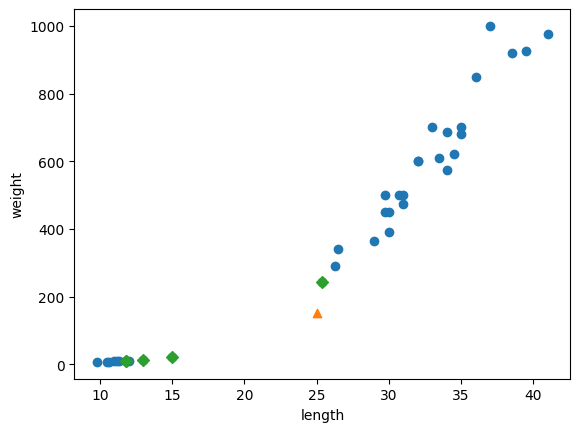

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [ ]:
print(train_target[indexes])      # 예측에 사용된 가장 가까운 이웃 5개의 정답 레이블(도미=1, 빙어=0) 을 출력한다.

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)

[[ 92.58596006 130.1        137.81451302 140.03656665 140.13654056]]


육안으로 도미가 가까우나 eucledian method방식으로 거리 계산함으로 저게 맞음
weight 차이 많이나는거 고려하면

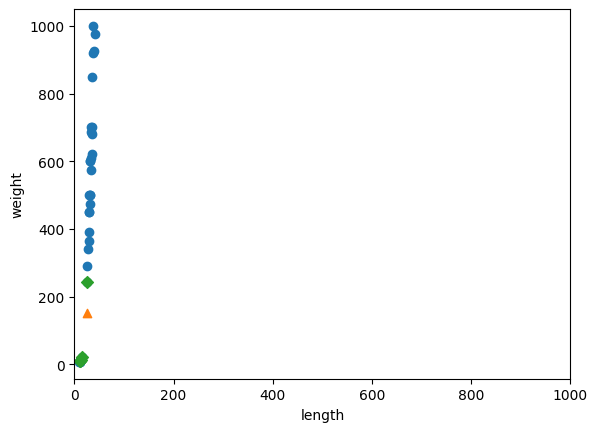

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])     # 표준화전 훈련데이터 x축 길이 y측 무게 해서 훈련데이터 전체 점으로 표시
plt.scatter(25, 150, marker='^')                   # 새 데이터 표시 (길이 25cm, 무게 150g) 삼각형(^) 마커로 강조
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')   # 새 데이터와 가장 비슷한 훈련 데이터 몇 개를 다이아몬드(D) 모양으로 그래프에 표시
plt.xlim((0,1000))                #x축 길이 범위를 0~1000으로 제한
plt.xlabel('length')
plt.ylabel('weight')
plt.show()                          #x축: 길이, y축: 무게 화면에 그래프 출력

In [ ]:
mean = np.mean(train_input, axis=0)      # 평균계산
std = np.std(train_input, axis=0)        # 표준편차 계산


표준점수= 각 특성값이 평균에서 표준편차의 몇배만큼 떨어져있는지 나타냄

표준편차= 분산의 제곱근

In [ ]:
print(mean, std)           # 평균과 표준 편차 구함

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [ ]:
train_scaled = (train_input - mean) / std     #train_input 의 모든행에서 mean 의 두 평균값(길이, 무게)빼줌 그리고 그 배열을 std로 나눔

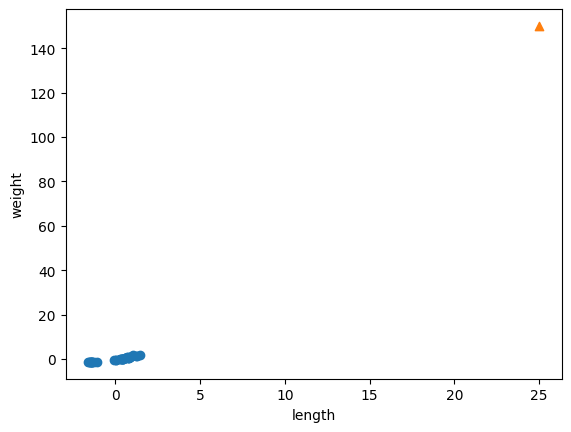

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])   #훈련데이터(train_scaled)의 모든 그래프화
plt.scatter(25, 150, marker='^')              #(25, 150) 위치에 삼각형(^) 모양의 점을 하나 찍음
plt.xlabel('length')             #x축 이름을 ‘length’(길이) 로 붙입니다
plt.ylabel('weight')             #y축 이름을 ‘weight’(무게) 로 붙입니다
plt.show()                       #지금까지 설정한 그래프를 화면에 표시

훈련데이터(train_scaled) 는 이미 “스케일링(표준화)” 돼 있어서
숫자들이 작음.

하지만 (25, 150)은
원래 단위 그대로(길이 25cm, 무게 150g) 쓰고 있음.

그래서

훈련데이터 점들은 (0, 0) 근처에 몰려 있는데

(25,150)은 너무 큰 숫자라서 그래프의 아주 멀리, 거의 화면 밖에 찍혀버려요

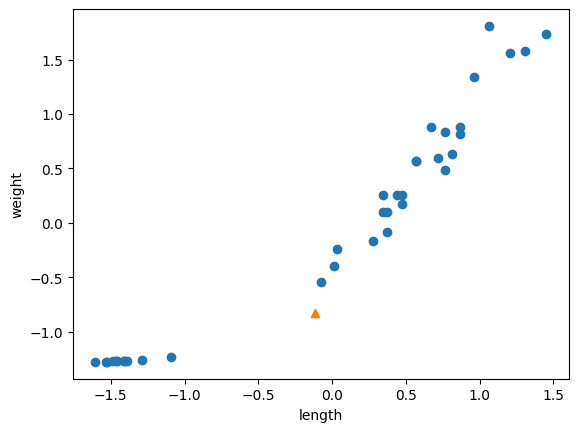

In [ ]:
new = ([25, 150]- mean) / std       #새 데이터 [25, 150] (예: 길이 25cm, 무게 150g)을 학습 데이터와 같은 기준으로 표준화(스케일링) 하는 코드
plt.scatter(train_scaled[:,0], train_scaled[:,1]) #표준화된 훈련 데이터 전체를 점찍기 x축: 첫 번째 특성 (길이) y축: 두 번째 특성 (무게)
plt.scatter(new[0], new[1], marker='^')         #방금 만든 표준화된 new 데이터를 삼각형(^) 마커로 표시합니다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()                           #x축 이름을 'length', y축 이름을 'weight'로 붙이고 그래프를 화면에 출력

이 부분에서
새로운 점 [25, 150]을 학습 데이터와 똑같이 표준화(스케일링) 했음

그래서 이제 train_scaled 와 new 둘 다 같은 기준으로 맞춰졌고,

그래프에 찍으면 같은 영역 안에 자연스럽게 표시됨

In [ ]:
kn.fit(train_scaled, train_target)   # KNN 모델에게 훈련 데이터와 정답을 보여주어, 나중에 새 데이터를 넣으면 가장 가까운 이웃을 찾아 예측할 수 있도록 준비시키는 단계

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input - mean) / std   #테스트 데이터를 훈련 데이터와 같은 기준으로 표준화(스케일링)

In [ ]:
kn.score(test_scaled, test_target)     # 테스트 데이터를 모델에 넣어 예측한 값과 실제 정답을 비교해 정확도를 계산

1.0

In [ ]:
print(kn.predict([new]))                    #학습된 모델 kn으로 새 데이터 new의 클래스를 예측하고 결과를 출력

[1.]


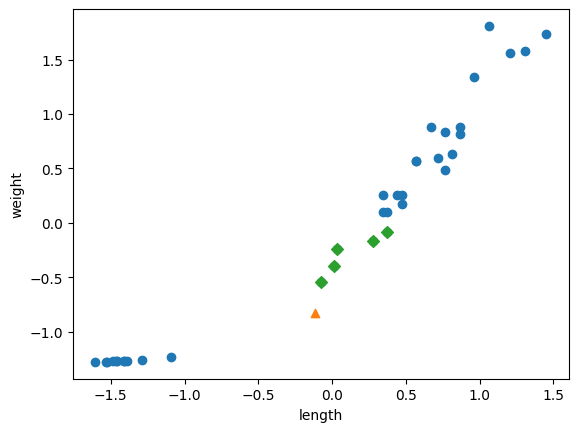

In [ ]:
distances, indexes = kn.kneighbors([new])              # 새 데이터 new에 대해 가장 가까운 k개의 훈련 샘플과 그 거리를 알려주는 함수
plt.scatter(train_scaled[:,0], train_scaled[:,1])      #표준화된 훈련 데이터 전체를 점으로 표시 x축 → 첫 번째 특성(길이) y축 → 두 번째 특성(무게)
plt.scatter(new[0], new[1], marker='^')                #새 데이터 new를 삼각형(^) 마커로 표시
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')    # indexes에 해당하는 훈련 데이터 중 가장 가까운 k개의 이웃을 다이아몬드(D) 마커로 표시
plt.xlabel('length')                         # x축 length
plt.ylabel('weight')                         # y축 weight
plt.show()                                   # 그래프 화면에 출력